In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open("rating_processed.json") as f:
    data = json.load(f)

In [4]:
import pandas as pd
df = pd.DataFrame(columns=["Breed", "Adaptability", "All Around Friendliness", "Exercise Needs", "Health Grooming", "Trainability", "Adapts Well to Apartment Living", "Affectionate with Family", "Amount Of Shedding", "Dog Friendly", "Drooling Potential", "Easy To Groom", "Easy To Train", "Energy Level", "Friendly Toward Strangers", "General Health", "Good For Novice Owners", "Incredibly Kid Friendly Dogs", "Intelligence", "Intensity", "Potential For Mouthiness", "Potential For Playfulness", "Potential For Weight Gain", "Prey Drive", "Sensitivity Level", "Size", "Tendency To Bark Or Howl", "Tolerates Being Alone", "Tolerates Cold Weather", "Tolerates Hot Weather", "Wanderlust Potential", "Shelter Dog"])

In [5]:
row = 0
for i in data['dog_breeds']:
    df.loc[row, "Breed"] = i
    for j in data['dog_breeds'][i]:
        df.loc[row, j] = data['dog_breeds'][i][j]
    row = row + 1

In [7]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 31].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

[[ 5  4  0  2  0]
 [ 2 16  1  0  0]
 [ 0  1  5  0  0]
 [ 1  2  0  0  0]
 [ 3  0  0  0  1]]
                           precision    recall  f1-score   support

American Pit Bull Terrier       0.45      0.45      0.45        11
                    Boxer       0.70      0.84      0.76        19
                Chihuahua       0.83      0.83      0.83         6
      German Shepherd Dog       0.00      0.00      0.00         3
       Labrador Retriever       1.00      0.25      0.40         4

                 accuracy                           0.63        43
                macro avg       0.60      0.48      0.49        43
             weighted avg       0.63      0.63      0.61        43



In [12]:
user_dog = input("Enter your preffered dog breed: ")

Enter your preffered dog breed: Golden Retriever


In [13]:
#Shelter dog prediction
user_dog_search = df.loc[df['Breed'] == user_dog]
X_user_dog = user_dog_search.iloc[:, 1:-1].values
user_dog_pred = classifier.predict(X_user_dog)
print(user_dog_pred)

['Labrador Retriever']


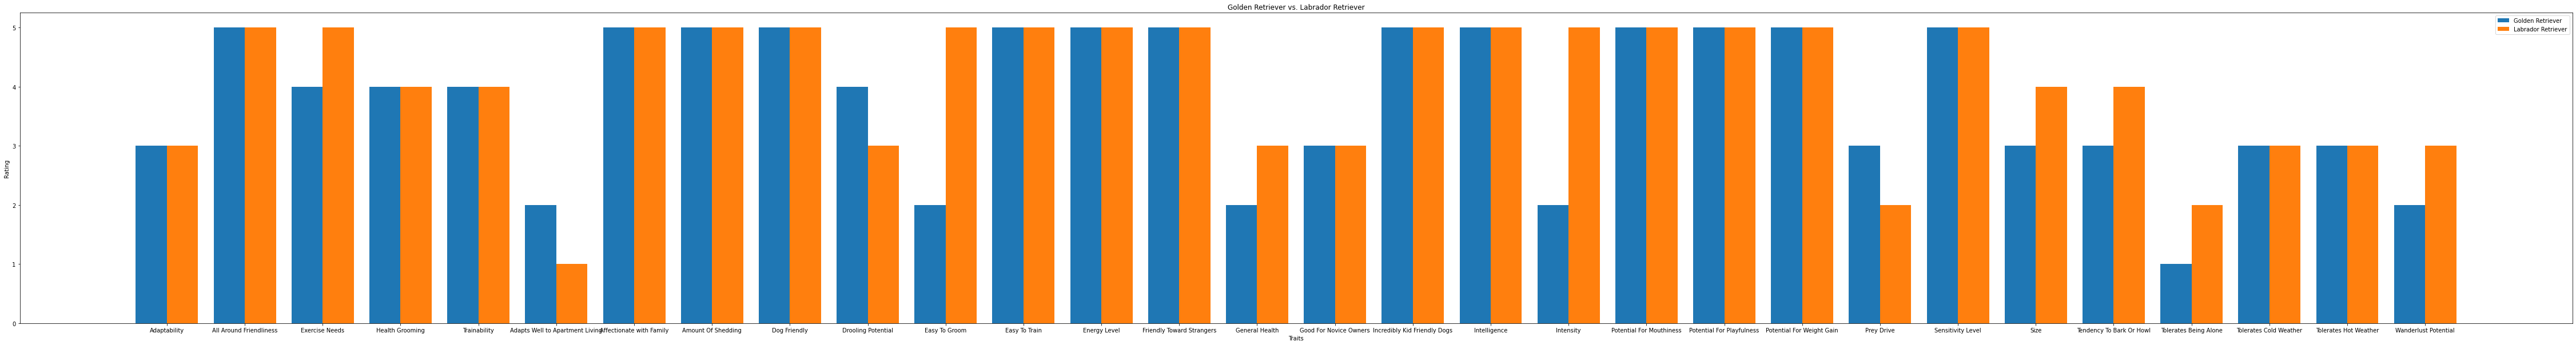

In [14]:
#Selected dog vs. Shelter dog bar chart comparison
pred_dog_search = df.loc[df['Breed'] == user_dog_pred[0]]
X_bar = list(df.columns.values)
Y_user_dog = X_user_dog[0]
pred_dog_values = pred_dog_search.iloc[:, 1:-1].values
Y_pred_dog = pred_dog_values[0]
X_axis = np.arange(len(X_bar[1:-1]))
f = plt.figure()
f.set_figwidth(80)
f.set_figheight(10)
plt.bar(X_axis - 0.2, Y_user_dog, 0.4, label = user_dog)
plt.bar(X_axis + 0.2, Y_pred_dog, 0.4, label = user_dog_pred[0])
plt.xticks(X_axis, X_bar[1:-1])
plt.xlabel("Traits")
plt.ylabel("Rating")
plt.title(user_dog + " vs. " + user_dog_pred[0])
plt.legend()
plt.show()

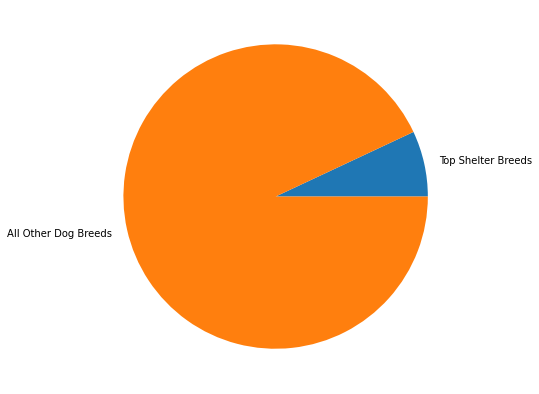

In [17]:
#Pie chart comparing the 15 top shelter breeds to the number of other dog breeds
shelter_vs_all = ['Top Shelter Breeds', 'All Other Dog Breeds']
other_breeds = row - 14
breed_num = [15, other_breeds]
fig = plt.figure(figsize =(10, 7))
plt.pie(breed_num, labels = shelter_vs_all)
plt.show()

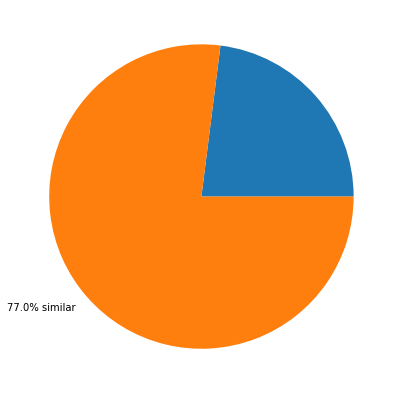

In [16]:
# Pie chart displaying the percent difference between the traits of the user's selected dog and the predicted shelter dog
sum_perc_diff = 0
j = 0
for i in Y_user_dog:
    float_user = float(i)
    float_pred = float(Y_pred_dog[j])
    trait_diff = abs(((float_user - float_pred)/float_user) / 30.0)
    sum_perc_diff = sum_perc_diff + trait_diff
    j = j + 1
rounded_perc = round(sum_perc_diff, 2) * 100
perc_similar = 100 - rounded_perc
percentage_label = ['', str(perc_similar) + '% similar']
percentage = [rounded_perc, perc_similar]
fig2 = plt.figure(figsize =(10, 7))
plt.pie(percentage, labels = percentage_label)
plt.show()